In [83]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtrain.csv"))

In [86]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [87]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000
1257,2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500


In [88]:
print("The shape of training data = {}".format(train.shape))

The shape of training data = (1258, 7)


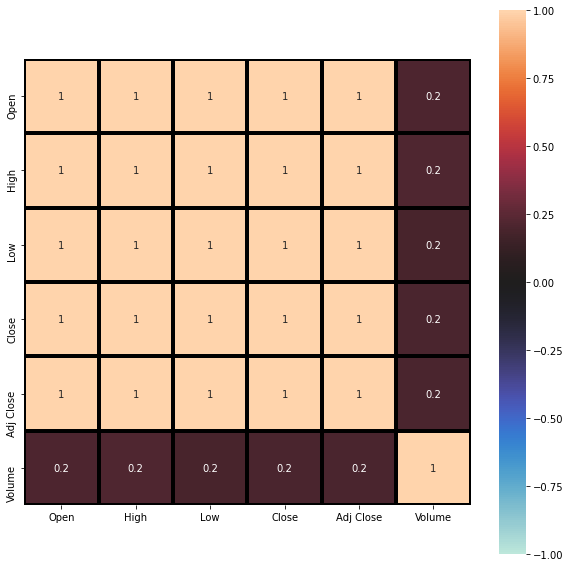

In [89]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, linewidths = 3, linecolor = "black", square = True)

In [90]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,823.840056,831.762583,814.173943,823.256543,823.256543,4.231814e+06
std,477.931392,482.851261,471.058235,476.952699,476.952699,2.400533e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.093000e+06
25%,393.892494,398.795006,388.427513,394.772492,394.772492,2.713950e+06
50%,726.450012,729.779999,720.079986,727.190002,727.190002,3.582300e+06
75%,1005.860016,1009.742493,997.122513,1002.762496,1002.762496,4.857900e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


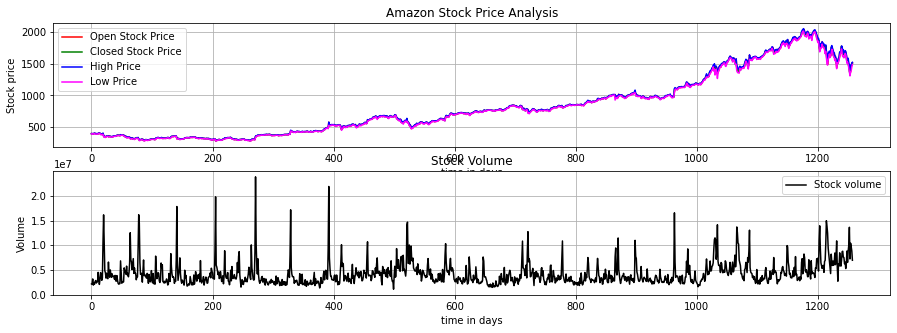

In [92]:
plt.figure(figsize = (15, 5))
plt.subplot(2,1,1)
plt.plot(train.Open.values, color = "red", label = "Open Stock Price")
plt.plot(train.Close.values, color = "green", label = "Closed Stock Price")
plt.plot(train.High.values, color = "blue", label = "High Price")
plt.plot(train.Low.values, color = "magenta", label = "Low Price")
plt.title("Amazon Stock Price Analysis")
plt.xlabel("time in days")
plt.ylabel("Stock price")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")

plt.subplot(2,1,2)
plt.plot(train.Volume.values, color= "black", label = "Stock volume")
plt.title("Stock Volume")
plt.xlabel("time in days")
plt.ylabel("Volume")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")
plt.show()

In [0]:
train.drop(["Volume","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)

In [94]:
train.shape

(1258, 1)

In [0]:
train = train.values

In [96]:
type(train)

numpy.ndarray

In [97]:
train

array([[ 398.799988],
       [ 398.290009],
       [ 395.850006],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

In [0]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)

In [0]:
x_train, y_train = [], []
time_step = 40
for i in range(time_step, train_scaled.shape[0]):
  x_train.append(train_scaled[i-time_step : i , 0])
  y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [100]:
x_train.shape

(1218, 40)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))

In [0]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

In [0]:
model.compile(tf.keras.optimizers.Adam(lr = 0.001), loss = "mean_squared_error")

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 40, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 40, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 40, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [124]:
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0012
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0013
Epoch 3/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0012
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0011
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0012
Epoch 6/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0012
Epoch 7/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0011
Epoch 8/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0011
Epoch 9/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0013
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0012
Epoch 11/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0012
Epoch 12/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0011
Epoch 13/100
77/77 [=====

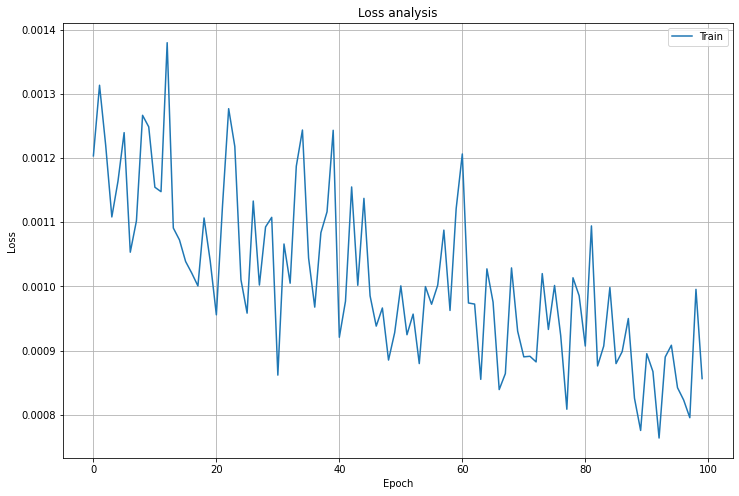

In [125]:
plt.figure(figsize = (12, 8))
plt.plot(history.history["loss"], label = "Training loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train"])
plt.grid("both")

In [0]:
model_json = model.to_json()
with open("amazon_model_01.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("amazon_model_01.h5")

In [0]:
test = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtest.csv"))
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtrain.csv"))

In [128]:
test.shape

(21, 7)

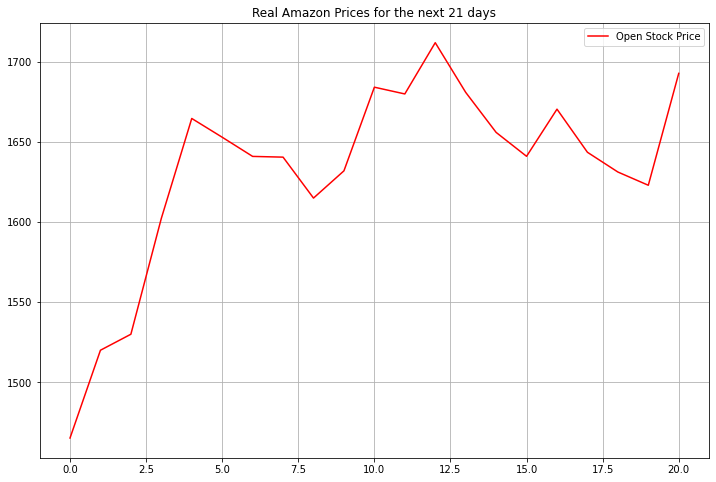

In [129]:
plt.figure(figsize = (12, 8))
plt.subplot(1,1,1)
plt.plot(test.Open.values, color = "red", label = "Open Stock Price")
plt.grid("both")
plt.title("Real Amazon Prices for the next 21 days")
plt.legend()

In [0]:
test.drop(["Volume","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)
train.drop(["Volume","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)

In [0]:
real_prices = test.values

In [0]:
dataset_total = pd.concat((train["Open"], test["Open"]), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(test) - time_step : ].values

In [0]:
inputs = inputs.reshape(-1, 1)

In [0]:
inputs = scaler.fit_transform(inputs)

In [136]:
inputs.shape

(61, 1)

In [0]:
x_test = []
for i in range(time_step, inputs.shape[0]):
  x_test.append(inputs[i - time_step : i , 0])
x_test = np.array(x_test)

In [138]:
x_test.shape

(21, 40)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predicted_prices = model.predict(x_test)

In [0]:
predicted_prices = scaler.inverse_transform(predicted_prices)

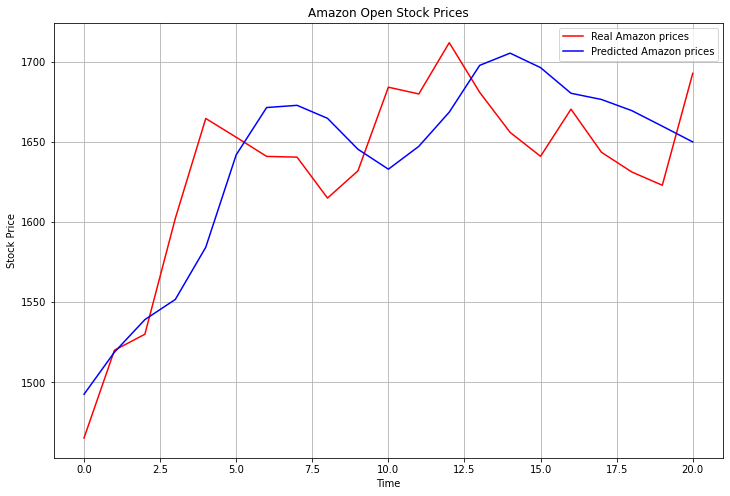

In [142]:
plt.figure(figsize= (12, 8))
plt.subplot(1,1,1)
plt.plot(real_prices, color = "red", label = "Real Amazon prices")
plt.plot(predicted_prices, color = "blue", label = "Predicted Amazon prices")
plt.title("Amazon Open Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid("both")
plt.show()